### Imports

In [1]:
from Garage import Augmenter
from PIL import Image

%load_ext autoreload
%autoreload 2

### Model initialization

In [2]:
model = Augmenter()

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


### Examples of working

In [7]:
from PIL import Image
image = Image.open(
    "/home/jovyan/nkiselev/istepanov/GarageFlux/Garage/examples/image.jpg")
cat_mask = Image.open("examples/cat_mask.jpg")

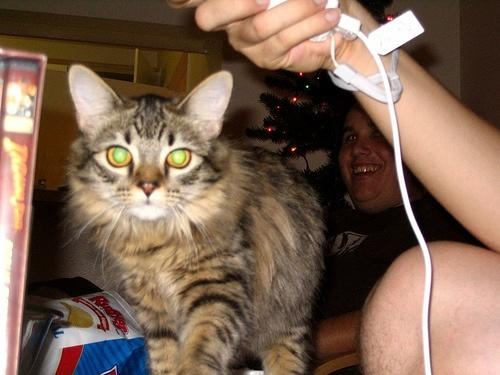

In [4]:
image

In [13]:
from ultralytics import YOLO
import cv2
from PIL import Image

image = Image.open("/home/jovyan/nkiselev/istepanov/GarageFlux/Garage/examples/dog.jpg").convert("RGB")
# cat_mask = Image.open("examples/cat_mask.jpg")

# 1. Загрузка модели для детекции (без сегментации)
model1 = YOLO("yolo11n.pt")  # Официальная модель детекции

# 2. Предсказание bbox
results = model1(image)

print(results[0].boxes)
# 3. Извлечение bounding boxes


0: 448x640 1 dog, 5.0ms
Speed: 1.5ms preprocess, 5.0ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16.], device='cuda:0')
conf: tensor([0.8979], device='cuda:0')
data: tensor([[8.0801e+02, 5.2011e+02, 1.7878e+03, 9.8545e+02, 8.9785e-01, 1.6000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (1365, 2048)
shape: torch.Size([1, 6])
xywh: tensor([[1297.9189,  752.7787,  979.8085,  465.3381]], device='cuda:0')
xywhn: tensor([[0.6337, 0.5515, 0.4784, 0.3409]], device='cuda:0')
xyxy: tensor([[ 808.0146,  520.1097, 1787.8231,  985.4478]], device='cuda:0')
xyxyn: tensor([[0.3945, 0.3810, 0.8730, 0.7219]], device='cuda:0')


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


  0%|          | 0/50 [00:00<?, ?it/s]

This dog is a large, brown, black and white, adult male, with a black nose and floppy ears. 0.2437744140625


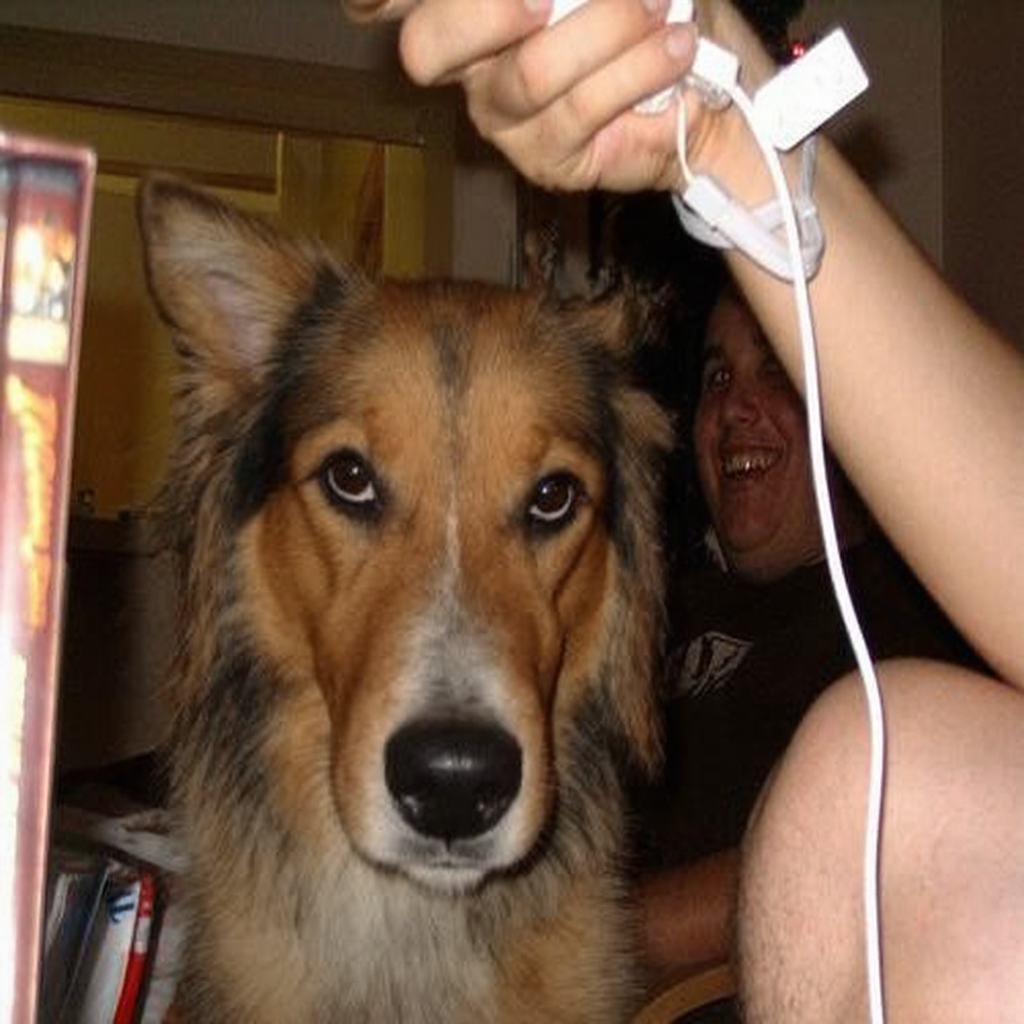

In [10]:
result, prompt, threshold = model(
    image=image,
    mask=cat_mask,

    current_object="cat",
    ddim_steps=50,
    guidance_scale=30,
    seed=42
)

print(prompt, threshold)
result

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  0%|          | 0/50 [00:00<?, ?it/s]

New object: bear, prompt: The bear is a large, brown creature with a round head and a long snout. It is standing on all fours and looking directly at the camera. The bear's fur is a mix of brown and black, and its eyes are a deep,



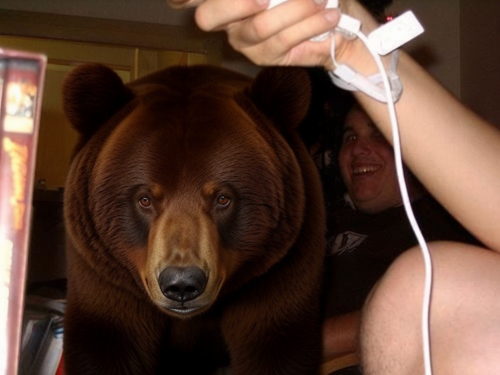

In [5]:
new_image, (prompt, new_object) = model(image=image,
                                    mask=cat_mask,
                                    current_object="cat",
                                    new_objects_list=["wolf", "train", "tree", "rabbit", "bear", "car"],
                                    ddim_steps=50,
                                    guidance_scale=5,
                                    seed=42,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image.show()